In [1]:
# ez most tökéletesen működik 2024.05.10. 21:35
# új módon, importált TZ függvényekkel

###Tedd elérhetővé a "FLYBALLCZ_versenyadatok.xlsx" alapadatokat
Ha Google Colabban futtatod, töltsd fel és csomagoltasd ki a "Flyball_input.zip" fájlt. Ha nem abban, lépd át ezeket a cellákat.

In [2]:
######### 240502 ######## Google Colab-ba fájlok feltöltése
from google.colab import files
import os

# Minden korábbi fájl és mappa törlése a Colab környezetben
files_and_folders = os.listdir()
for item in files_and_folders:
    if os.path.isfile(item):
        os.remove(item)

# Fájlok feltöltése
uploaded_files = files.upload()

# A feltöltött fájlok neveinek kinyerése
file_name = list(uploaded_files.keys())[0]

Saving Flyball_input.zip to Flyball_input.zip


In [3]:
### 240502 ### Google Colab-ban ZIP file kicsomagolása
from zipfile import ZipFile

with ZipFile(file_name, 'r') as zipfile2:
    zipfile2.extractall()
    print('Kicsomagolt fájlok:')
    for name in zipfile2.namelist():
        print(name)
    print('Done')

Kicsomagolt fájlok:
df_EFC_output.csv
df_CZ_output.csv
Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx
FLYBALLCZ_versenyadatok.xlsx
EFC_versenyadatok.xlsx
TZ_functions.py
df_EFC_CZ_track_good-date.csv
df_WRFT_output.csv
df_events.csv
df_EFC_CZ_post_analyzing_merged.csv
df_EFC_CZ_Weather.csv
Done


# alap importok és mindenféle megjelenítési beállítások, kikommentelve igény szerint:

In [4]:
from IPython.display import display, HTML
import pandas as pd

# Beállítások
pd.set_option('display.max_rows', False)           # Az összes sor megjelenítése
pd.set_option('display.max_colwidth', None)        # Teljes méretű szöveges oszlopok
pd.set_option('display.expand_frame_repr', False)  # DataFrame vízszintes kiterjesztése kikapcsolva
pd.set_option('display.max_columns', 0)            # Az összes oszlop megjelenítése

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import shutil
sns.set(style="ticks")
seed=42
np.random.seed(seed)
#maximális oszlopszám megjelenítése
pd.options.display.max_columns = 20

In [6]:
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
pd.options.display.max_colwidth =300

# SAJÁT FÜGGVÉNYEK:

In [8]:
# betöltöm a 'TZ_functions.py' fájlban található saját gyártású, rendszeresen használt függvényeket
get_ipython().run_line_magic('run', 'TZ_functions.py')

 ############### ADATDOKI függvényei   ############### 
 ############### TZ_functions.py       ############### 
 ############### version = 2024.05.11. ############### 
A li() függvény listázásnál, legyen alapértelmezett a sorok száma?
 0 = ne legyen, azaz listázáskor rákérdez. Vagy szám = ennyi sort listáz rákérdezés nélkül. ("enter" változó)8


#Adat importálások:

In [9]:
# most csak belenézünk az adatokba
import pandas as pd

excel_file_name = "FLYBALLCZ_versenyadatok.xlsx"

# Excel fájl beolvasása
df_CZ = pd.read_excel(excel_file_name)

# Adatok megjelenítése
li(df_CZ)

,Unnamed: 0,Hanácké škvarek (Heroltice) 2023. április 22-23.,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno,stříd.,2.pes,jméno,stříd.,3.pes,jméno,stříd.,4.pes
1,1.0,1,10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13
2,2.0,1,10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28
3,3.0,1,10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18
4,4.0,1,10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28
5,5.0,1,10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,V,25,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08
6,6.0,1,10:15:06,WildRunners Maximini,WildRunners dreamers,18.01,P,25,Brooke,-0.59,4.28,Rocky,0.54,5.16,Bella,chyba,4.57,Bree,-0.17,4.22
7,7.0,1,10:37:19,WildRunners hopefuls,FOFR DOG,16.14,P,27.5,Enola,0.2,3.87,Maggie,0.13,3.97,Tyna,chyba,4.1,Moon,chyba,3.87


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


Látszik, hogy fejlécet csinál a helyszín sorból, inkább az első sort oszloppá célszerű kivágni, akkor kerül helyre a fejléc sor. Ez tartalmazza a helyszíneket.

In [10]:
# Az első sor második cellájának értékének kinyerése, itt vannak a helyszín adatok.
first_cell_value = df_CZ.columns[1]
#print(first_cell_value)
# Excel fájl beolvasása, a füleken a sorok 1 sorral át vannak ugorva.
# Így már jól kezeli a fejléc mezőket, mert az eredetileg 2. sor lenne az adatok fejléce.
df_CZ = pd.read_excel("EFC_versenyadatok.xlsx", skiprows=1)
#li(df_CZ.head(20))
# Az első sor adatainak beszúrása minden sorba a DataFrame utolsó oszlopa utáni oszlopba. Így kiegészül az adat a helyszínnel is.
df_CZ.insert(len(df_CZ.columns), 'event_place', first_cell_value)
li(df_CZ)

,Unnamed: 0,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,event_place
0,1,13,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.64,4.89,Zuma,0.36,4.30,Marshall,0.3,6.14,Hanácké škvarek (Heroltice) 2023. április 22-23.
1,2,13,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,OK,5.20,Negro,0.51,4.89,Speedy,0.4,4.93,Hanácké škvarek (Heroltice) 2023. április 22-23.
2,3,13,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,Hanácké škvarek (Heroltice) 2023. április 22-23.
3,4,13,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,Hanácké škvarek (Heroltice) 2023. április 22-23.
4,5,13,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,Hanácké škvarek (Heroltice) 2023. április 22-23.
5,6,13,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.2,5.48,Negro,ok,5.07,Speedy,0.18,5.22,Hanácké škvarek (Heroltice) 2023. április 22-23.
6,7,13,1900-01-01 12:30:34,Real Ballance Flyball Team,WildRunners Zephyr,20.88,L,15.0,Chase,0.220,4.32,Rubble,OK,5.16,Zuma,OK,4.69,Marshall,ok,6.49,Hanácké škvarek (Heroltice) 2023. április 22-23.
7,8,13,1900-01-01 12:30:34,WildRunners Zephyr,Real Ballance Flyball Team,20.81,W,25.0,Brix,0.230,4.57,Them,0.21,5.63,Negro,Ok,4.86,Speedy,OK,5.31,Hanácké škvarek (Heroltice) 2023. április 22-23.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [11]:
# "FLYBALLCZ_versenyadatok.xlsx" 2024.03.03 ez a jó egyesítés, első oszlop átnevezéssel
# A dfs szótárt összemásolja df_CZ dataframe-be.

import pandas as pd
from IPython.display import display, HTML

def process_excel_file(df, first_cell_value):
    try:
        # Az első sor adatainak beszúrása minden sorba a DataFrame utolsó oszlopa utáni oszlopba
        df.insert(len(df.columns), 'event_place', first_cell_value)

        # Visszatérés a feldolgozott DataFrame-mel
        return df

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def read_and_process_excel(file_name):
    # Fülek beolvasása
    loaded_sheets = read_excel_sheets(file_name)

    # Ellenőrzés, hogy sikeres volt-e a beolvasás
    if loaded_sheets:
        # Az összes DataFrame összegyűjtése
        all_dfs = []

        # Fülek feldolgozása és kiíratása
        for sheet_name, df in loaded_sheets.items():
            print(f"Processing Sheet: {sheet_name}")

            # Az első sor beolvasása
            df_first_row = pd.read_excel(file_name, sheet_name=sheet_name, nrows=1)
            first_cell_value = df_first_row.columns[1]

            processed_df = process_excel_file(df, first_cell_value)

            # Cserélje le minden fül 1. sorának eldobása után a maradó 1. oszlopának fejlécét "sorsz" -ra
            processed_df.columns.values[0] = "sorsz"

            if processed_df is not None:
                li(processed_df.head(20))
                all_dfs.append(processed_df)

        # Az összes DataFrame egyesítése
        df_CZ = pd.concat(all_dfs, ignore_index=True)

        # Visszatérés az egyesített DataFrame-mel
        return df_CZ

def read_excel_sheets(file_name):
    try:
        # ExcelFile objektum létrehozása az Excel-fájl betöltésével
        excel_file = pd.ExcelFile(file_name)

        # Fülek neveinek lekérdezése
        sheet_names = excel_file.sheet_names

        # Fülek beolvasása és tárolása egy szótárban
        dfs = {}
        for sheet_name in sheet_names:
            dfs[sheet_name] = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)

        # ExcelFile bezárása
        excel_file.close()

        # Szótár visszaadása
        return dfs

    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Tesztelés
excel_file_name = "FLYBALLCZ_versenyadatok.xlsx"
df_CZ = read_and_process_excel(excel_file_name)
li(df_CZ)


Processing Sheet: Hanácké škvarek


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,1,10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,Hanácké škvarek (Heroltice) 2023. április 22-23.
1,2,1,10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
2,3,1,10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,Hanácké škvarek (Heroltice) 2023. április 22-23.
3,4,1,10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
4,5,1,10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08,Hanácké škvarek (Heroltice) 2023. április 22-23.
5,6,1,10:15:06,WildRunners Maximini,WildRunners dreamers,18.01,P,25.0,Brooke,-0.59,4.28,Rocky,0.54,5.16,Bella,chyba,4.57,Bree,-0.17,4.22,Hanácké škvarek (Heroltice) 2023. április 22-23.
6,7,1,10:37:19,WildRunners hopefuls,FOFR DOG,16.14,P,27.5,Enola,0.20,3.87,Maggie,0.13,3.97,Tyna,chyba,4.1,Moon,chyba,3.87,Hanácké škvarek (Heroltice) 2023. április 22-23.
7,8,1,10:37:19,FOFR DOG,WildRunners hopefuls,18.43,P,22.5,Hessie,-0.06,4.76,Dizzy,OK,4.41,Tex,0.32,3.85,Ogi,0.36,4.78,Hanácké škvarek (Heroltice) 2023. április 22-23.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Eager´s Cup 1


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1.0,8.0,09:34:19,RUNami B,WildRunners XXL,5.04,NaN,17.5,Butch,0.090,4.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
1,2.0,8.0,09:35:28,RUNami B,WildRunners XXL,20.26,P,17.5,Butch,0.100,4.38,Hettie,0.4,4.72,Kody,0.21,4.6,Ajsy,0.62,5.24,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
2,3.0,8.0,09:35:28,WildRunners XXL,RUNami B,23.32,P,15.0,Negro,-0.400,4.95,Gordon,0.65,6.78,Dusty,0.24,5.87,Kesha,chyba,5.23,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
3,4.0,8.0,09:36:45,RUNami B,WildRunners XXL,20.35,V,17.5,Butch,0.040,5.19,Hettie,0.29,4.74,Kody,0.35,4.11,Ajsy,0.48,5.15,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
4,5.0,8.0,09:36:45,WildRunners XXL,RUNami B,22.25,P,15.0,Negro,-0.230,4.78,Gordon,ok,6.55,Dusty,NaN,5.87,Kesha,chyba,5.28,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
5,6.0,8.0,09:38:22,RUNami B,WildRunners XXL,19.48,P,17.5,Butch,-0.005,4.46,Hettie,0.25,4.9,Kody,0.14,4.26,Ajsy,0.39,5.09,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
6,7.0,8.0,09:38:22,WildRunners XXL,RUNami B,33.77,P,15.0,Negro,-0.100,4.94,Gordon,0.23,6.87,Dusty,0.48,6.03,Kesha,chyba,15.32,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
7,8.0,8.0,09:43:25,FÉNIX,JokerZ Lou,4.23,NaN,15.0,Banán,0.070,4.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Eager´s Cup 2


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1.0,5.0,09:24:34,WildRunners Maximini,Wing BEAST,0.00,NaN,25.0,Gerry,1.80,mimo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
1,2.0,5.0,09:26:17,Wing BEAST,WildRunners Maximini,18.22,V,15.0,Bella,0.05,4.23,Jamie,0.2,3.89,Brooklyn,0.14,4.25,Joker,OK,5.47,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
2,3.0,5.0,09:26:17,WildRunners Maximini,Wing BEAST,18.03,P,25.0,Gerry,0.04,4.63,Riley,NaN,4.54,Bree,-0.21,4.12,Bruno,0.21,4.7,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
3,4.0,5.0,09:27:33,Wing BEAST,WildRunners Maximini,18.20,V,15.0,Bella,0.03,4.27,Jamie,0.17,3.86,Brooklyn,OK,4.35,Joker,OK,5.52,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
4,5.0,5.0,09:27:33,WildRunners Maximini,Wing BEAST,18.54,P,25.0,Gerry,0.16,mimo,Riley,NaN,4.49,Bree,chyba,4.14,Bruno,0.22,4.77,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
5,6.0,5.0,09:29:31,Wing BEAST,WildRunners Maximini,18.06,P,15.0,Bella,0.08,4.26,Jamie,OK,3.82,Brooklyn,0.14,4.17,Joker,chyba,5.58,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
6,7.0,5.0,09:29:31,WildRunners Maximini,Wing BEAST,18.25,P,25.0,Riley,-0.04,4.4,Bree,chyba,4.15,Bruno,0.24,4.64,Gerry,0.34,4.54,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
7,8.0,5.0,09:34:18,Hop Trop HURRICANE,Fire-Drakes,18.99,P,20.0,Uta,-0.03,4.47,Cayenne,0.21,4.16,Choose,0.13,4.59,Lucka,1.28,4.18,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Flyvaryors turnaj


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,5,09:08:07,Manic Dogs 3,Free X-treme,36.36,NaN,20.0,Api,0.16,4.36,Andy,OK,4.25,Spark,OK,4.67,Džespr,0.38,5.72,Flyvaryors turnaj (Blšany) 2023. május 20-21.
1,2,5,09:08:07,Free X-treme,Manic Dogs 3,20.39,NaN,17.5,Scotty,0.11,4.39,Yuki,0.2,4.7,Lucky,0.32,5.19,Percy,0.71,4.8,Flyvaryors turnaj (Blšany) 2023. május 20-21.
2,3,5,09:12:53,Manic Dogs 3,Free X-treme,19.27,P,20.0,Api,0.07,4.45,Andy,chyba,4.15,Spark,chyba,4.64,Džespr,0.57,5.4,Flyvaryors turnaj (Blšany) 2023. május 20-21.
3,4,5,09:12:53,Free X-treme,Manic Dogs 3,19.94,P,17.5,Scotty,0.29,4.44,Yuki,OK,4.93,Lucky,ok,5.24,Percy,-0.12,5.17,Flyvaryors turnaj (Blšany) 2023. május 20-21.
4,5,5,09:14:06,Manic Dogs 3,Free X-treme,13.84,NaN,20.0,Api,0.45,4.55,Andy,OK,4.28,Spark,chyba,4.57,Džespr,1.97,mimo,Flyvaryors turnaj (Blšany) 2023. május 20-21.
5,6,5,09:14:06,Free X-treme,Manic Dogs 3,20.09,NaN,17.5,Scotty,0.18,4.36,Yuki,0.23,4.87,Lucky,0.22,5.08,Percy,0.15,4.99,Flyvaryors turnaj (Blšany) 2023. május 20-21.
6,7,5,09:15:30,Free X-treme,Manic Dogs 3,20.38,V,17.5,Scotty,0.28,4.37,Yuki,0.26,4.88,Lucky,ok,5.17,Percy,0.44,4.99,Flyvaryors turnaj (Blšany) 2023. május 20-21.
7,8,5,09:21:29,Furious Rockets,FÉNIX,18.52,P,27.5,Bárny,-0.08,4.61,Shadow,OK,4.65,Kostimill,0.18,4.65,Cassiann,0.21,4.3,Flyvaryors turnaj (Blšany) 2023. május 20-21.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: MED's Trophy


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,4,09:07:45,FÉNIX,Free X-treme,21.43,V,15.0,Banán,0.20,4.01,Scary,ok,5.89,Berdy,0.18,4.65,Ketlin,ok,6.5,MED's Trophy (Pláně) 2023. június 10-11.
1,2,4,09:07:45,Free X-treme,FÉNIX,14.69,P,17.5,Scotty,0.15,4.21,Yuki,ok,4.96,Lucky,0.28,5.09,Affinity,0.66,mimo,MED's Trophy (Pláně) 2023. június 10-11.
2,3,4,09:09:16,FÉNIX,Free X-treme,21.26,V,15.0,Banán,0.02,4.05,Scary,ok,5.74,Berdy,0.31,4.58,Ketlin,0.2,6.36,MED's Trophy (Pláně) 2023. június 10-11.
3,4,4,09:09:16,Free X-treme,FÉNIX,27.09,P,17.5,Scotty,0.08,4.32,Yuki,0.14,4.79,Lucky,chyba,5.2,Affinity,3.43,9.13,MED's Trophy (Pláně) 2023. június 10-11.
4,5,4,09:10:41,FÉNIX,Free X-treme,21.03,V,15.0,Banán,0.21,4.07,Scary,OK,5.3,Berdy,0.24,4.59,Ketlin,0.22,6.41,MED's Trophy (Pláně) 2023. június 10-11.
5,6,4,09:10:41,Free X-treme,FÉNIX,25.23,P,17.5,Scotty,0.08,4.3,Yuki,NaN,4.94,Lucky,OK,5.03,Affinity,3.49,7.4,MED's Trophy (Pláně) 2023. június 10-11.
6,7,4,09:17:53,RUNami B,Manic Dogs 3,33.40,V,17.5,Zafi,0.16,4.19,Angie,0.16,4.54,Hettie,OK,5.35,Ajsy,0.59,5.15,MED's Trophy (Pláně) 2023. június 10-11.
7,8,4,09:17:53,Manic Dogs 3,RUNami B,20.54,P,20.0,Theodor,-0.11,4.07,Andy,0.17,4.16,Api,0.4,4.35,Džespr,1.73,5.8,MED's Trophy (Pláně) 2023. június 10-11.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: BCCCZ mistrovství


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,3,10:07:38,FÉNIX,WildRunners Wonders,38.97,V,20.0,Banán,0.16,4.14,Scary,OK,5.65,Chezz,0.55,4.91,Charlie,OK,5.45,BCCCZ mistrovství (Prostějov) 2023. június 24-25.
1,2,3,10:07:38,WildRunners Wonders,FÉNIX,36.78,P,15.0,Jasper,0.14,5.1,Gordon,chyba,6.51,Bailey,1.15,4.46,Punk,12.84,6.58,BCCCZ mistrovství (Prostějov) 2023. június 24-25.
2,3,3,10:08:59,FÉNIX,WildRunners Wonders,31.48,V,20.0,Banán,0.18,4.16,Scary,OK,4.52,Chezz,chyba,4.87,Charlie,chyba,5.36,BCCCZ mistrovství (Prostějov) 2023. június 24-25.
3,4,3,10:08:59,WildRunners Wonders,FÉNIX,37.80,P,15.0,Jasper,0.20,5.36,Gordon,0.25,7.25,Bailey,OK,4.71,Punk,3.84,4.27,BCCCZ mistrovství (Prostějov) 2023. június 24-25.
4,5,3,10:10:30,FÉNIX,WildRunners Wonders,33.84,V,20.0,Banán,0.10,4.3,Scary,OK,4.74,Chezz,NaN,5.15,Charlie,chyba,5.3,BCCCZ mistrovství (Prostějov) 2023. június 24-25.
5,6,3,10:10:30,WildRunners Wonders,FÉNIX,40.42,P,15.0,Jasper,0.12,5.57,Gordon,0.46,7.63,Bailey,0.38,4.56,Punk,Ok,5.13,BCCCZ mistrovství (Prostějov) 2023. június 24-25.
6,7,3,10:16:48,Furious Rockets,WildRunners XXL,31.09,P,27.5,Bárny,0.18,4.65,Shadow,chyba,4.65,Kostimill,OK,4.67,Cassiann,chyba,4.2,BCCCZ mistrovství (Prostějov) 2023. június 24-25.
7,8,3,10:16:48,WildRunners XXL,Furious Rockets,28.81,V,27.5,Scotty,0.53,4.87,Bruno,0.24,4.64,Rocky,0.68,4.99,Negro,0.82,4.94,BCCCZ mistrovství (Prostějov) 2023. június 24-25.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Crazy Cup


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,4,09:37:43,AgiFly one,FOFR DOG,18.08,P,27.5,Jamie,-0.04,4.68,Lara,0.23,4.43,Marwie,0.2,4.25,Atý,0.27,4.05,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
1,2,4,09:37:43,FOFR DOG,AgiFly one,17.76,V,27.5,Hessie,0.22,4.9,Dizzy,0.21,4.51,Tex,OK,3.98,Daggry,OK,3.94,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
2,3,4,09:47:56,AgiFly one,FOFR DOG,18.21,V,27.5,Jamie,0.24,4.59,Lara,0.43,4.41,Marwie,0.24,4.01,Atý,0.28,4.01,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
3,4,4,09:47:56,FOFR DOG,AgiFly one,17.63,P,27.5,Hessie,-0.05,4.92,Dizzy,OK,4.57,Tex,0.2,4.07,Daggry,ok,3.93,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
4,5,4,09:49:02,AgiFly one,FOFR DOG,17.78,V,27.5,Jamie,0.05,4.72,Lara,0.16,4.4,Marwie,OK,4.18,Atý,0.29,3.98,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
5,6,4,09:49:02,FOFR DOG,AgiFly one,17.91,P,27.5,Hessie,0.19,4.9,Dizzy,OK,4.66,Tex,0.14,3.97,Daggry,0.13,3.91,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
6,7,4,09:55:43,Hop Trop HURRICANE,The Rebels Rock and Roll,17.73,P,20.0,Dixi,-0.26,4.63,Uta,OK,4.4,Cayenne,OK,4.44,Choose,0.16,4.35,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
7,8,4,09:55:43,The Rebels Rock and Roll,Hop Trop HURRICANE,17.42,P,20.0,Beky,0.05,4.15,Kelsey,-0.23,4.23,Ellie,OK,4.17,Sheera,OK,5.06,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Máchale, spadlo ti to!


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,5,08:57:13,FUNatic Veterans,Manic Bumblebees,4.85,NaN,27.5,Pepina,0.05,4.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."
1,2,5,08:58:04,FUNatic Veterans,Manic Bumblebees,11.06,P,27.5,Pepina,0.03,4.72,Merlin,0.96,5.36,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."
2,3,5,08:58:04,Manic Bumblebees,FUNatic Veterans,9.05,V,27.5,Spark,0.05,4.64,Andy,ok,4.36,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."
3,4,5,08:59:12,FUNatic Veterans,Manic Bumblebees,10.05,P,27.5,Pepina,0.08,4.83,Merlin,chyba,5.14,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."
4,5,5,08:59:12,Manic Bumblebees,FUNatic Veterans,9.09,P,27.5,Spark,0.13,4.62,Andy,chyba,4.34,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."
5,6,5,09:00:02,FUNatic Veterans,Manic Bumblebees,10.47,P,27.5,Pepina,0.14,4.86,Merlin,ok,5.47,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."
6,7,5,09:00:02,Manic Bumblebees,FUNatic Veterans,9.25,V,27.5,Spark,0.19,4.68,Andy,OK,4.38,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."
7,8,5,09:03:42,Lavina,CrazyLadies,9.22,V,22.5,Týna,0.03,4.27,Líza,0.23,4.69,NaN,NaN,NaN,NaN,NaN,NaN,"Máchale, spadlo ti to! (Louňovice) 2023. július 15-16."


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Mistrovství České republiky


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,4,09:46:15,X-treme,WildRunners Zephyr,16.99,V,25.0,Kerby,0.110,3.91,Mína,0.38,3.86,Izzy,0.31,4.3,Nesi,0.13,3.98,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
1,2,4,09:46:15,WildRunners Zephyr,X-treme,18.47,P,20.0,Easy,-0.010,4.35,Fleur,0.24,4.24,Hank,0.55,4.44,Mason,OK,4.66,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
2,3,4,09:47:27,X-treme,WildRunners Zephyr,22.35,V,25.0,Kerby,0.050,3.94,Mína,OK,3.92,Izzy,OK,4.24,Nesi,0.37,4.03,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
3,4,4,09:47:27,WildRunners Zephyr,X-treme,18.63,P,20.0,Easy,0.090,4.4,Fleur,0.37,4.4,Hank,OK,4.65,Mason,ok,4.72,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
4,5,4,09:50:40,X-treme,WildRunners Zephyr,22.26,V,25.0,Kerby,0.060,3.93,Mína,0.17,3.9,Izzy,0.36,4.35,Nesi,0.19,4.08,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
5,6,4,09:50:40,WildRunners Zephyr,X-treme,21.05,P,27.5,Fleur,-0.130,4.83,Hank,0.16,4.52,Mason,chyba,4.74,Bailey,2.54,4.38,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
6,7,4,09:56:45,Flyvaryors Traditional,WildRunners Nightfall,15.83,P,27.5,Lippi,0.002,3.84,Tony,0.37,3.8,Rozi,0.26,3.89,Meggie,chyba,3.68,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
7,8,4,09:56:45,WildRunners Nightfall,Flyvaryors Traditional,17.51,V,25.0,Nina,0.110,4.14,Gerry,0.16,4.35,Milo,0.25,4.19,Hector,0.21,4.09,Mistrovství České republiky (Blšany) 2023. szeptember 3-4.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Křupky na břehu


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,2,09:29:37,The Rebels II,WildRunners dreamers,24.77,P,27.5,Beky,0.140,4.18,Kelsey,chyba,4.26,Ellie,0.13,4.09,Nyx,OK,mimo,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
1,2,2,09:29:37,WildRunners dreamers,The Rebels II,18.41,P,27.5,Nina,0.006,4.24,Brooke,0.48,4.21,Bruno,0.64,4.55,Hector,0.15,4.14,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
2,3,2,09:30:57,The Rebels II,WildRunners dreamers,17.44,P,27.5,Beky,0.060,4.27,Kelsey,0.12,4.33,Ellie,chyba,4.1,Nyx,OK,4.56,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
3,4,2,09:30:57,WildRunners dreamers,The Rebels II,22.09,P,27.5,Nina,0.040,4.27,Brooke,0.33,4.35,Bruno,0.28,4.93,Hector,2.59,5.3,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
4,5,2,09:32:18,The Rebels II,WildRunners dreamers,17.49,V,27.5,Beky,0.030,4.22,Kelsey,0.2,4.38,Ellie,OK,4.14,Nyx,Ok,4.52,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
5,6,2,09:32:18,WildRunners dreamers,The Rebels II,18.30,P,27.5,Nina,0.030,4.32,Brooke,0.2,4.1,Bruno,0.42,5,Hector,OK,4.23,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
6,7,2,09:38:28,RUNami A,CrazyBalls I.,16.68,P,25.0,Čoko,0.090,4.34,Fík,chyba,4.16,Black,-0.17,3.93,Elia,OK,4.33,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
7,8,2,09:38:28,CrazyBalls I.,RUNami A,17.11,V,20.0,Mia,0.030,4,Aivee,0.28,3.82,Scotty,0.24,4.28,Kokoska,0.22,4.24,Křupky na břehu (Litomyšl) 2023. szeptember 16-17.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Budějckej xtreme 1


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,7,08:04:30,JokerZ Lou,RUNami C,19.08,V,20.0,LeeLoo,0.08,4.41,Khumba,OK,4.46,Ria,OK,5.61,Árnyék,0.11,4.4,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
1,2,7,08:04:30,RUNami C,JokerZ Lou,19.89,P,27.5,Favi,-0.02,4.55,Butch,0.13,4.24,Amy,0.18,4.63,Hettie,0.47,5.7,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
2,3,7,08:06:07,JokerZ Lou,RUNami C,19.30,V,20.0,LeeLoo,0.08,4.27,Khumba,0.27,4.39,Ria,0.18,5.61,Árnyék,0.09,4.42,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
3,4,7,08:06:07,RUNami C,JokerZ Lou,18.92,P,27.5,Favi,0.13,4.58,Butch,OK,4.64,Hettie,0.44,4.55,Amy,chyba,4.59,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
4,5,7,08:07:14,JokerZ Lou,RUNami C,18.87,P,20.0,LeeLoo,-0.18,4.28,Khumba,0.14,4.47,Ria,OK,5.57,Árnyék,0.18,4.42,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
5,6,7,08:07:14,RUNami C,JokerZ Lou,18.98,V,27.5,Favi,0.05,4.75,Butch,OK,4.33,Hettie,0.24,4.7,Amy,0.17,4.74,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
6,7,7,08:13:18,Fantastic Beasts,Frenky’s Double Funny,49.15,P,15.0,Odyn,0.11,4.35,Nelly,OK,4.55,Lexie,0.57,4.28,Polar,0.48,5.55,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
7,8,7,08:13:18,Frenky’s Double Funny,Fantastic Beasts,21.48,P,27.5,Porto,0.09,4.22,Laty,ok,4.75,Trixie,3.49,4.03,Bailey,0.2,4.69,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)
Processing Sheet: Budějckej xtreme 2


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1,8,07:47:47,Free X-treme,Akela Sparks,3.95,NaN,NaN,0,-0.020,4.35,NaN,-0.38,mimo,NaN,NaN,NaN,NaN,NaN,NaN,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
1,2,8,07:48:16,Akela Sparks,Free X-treme,4.47,NaN,NaN,0,0.080,4.83,NaN,-0.45,mimo,NaN,NaN,NaN,NaN,NaN,NaN,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
2,3,8,08:05:39,Akela Sparks,Free X-treme,19.61,NaN,15.0,Emma,0.030,4.35,Alba,OK,5.01,Roy,0.27,4.51,Ében,ok,5.44,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
3,4,8,08:05:39,Free X-treme,Akela Sparks,20.87,NaN,17.5,Percy,0.260,5.36,Scotty,0.62,4.39,Lucky,OK,4.97,Blanca,ok,5.27,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
4,5,8,08:11:36,Akela Sparks,Free X-treme,20.15,V,15.0,Emma,0.080,4.4,Alba,ok,5.37,Roy,OK,4.62,Ében,0.27,5.41,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
5,6,8,08:11:36,Free X-treme,Akela Sparks,21.31,P,17.5,Percy,0.130,4.8,Scotty,0.22,5.77,Lucky,0.26,4.81,Blanca,ok,5.31,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
6,7,8,08:13:07,Akela Sparks,Free X-treme,20.05,P,15.0,Emma,0.070,4.46,Alba,OK,5.14,Roy,0.18,5.41,Ében,-0.95,5.74,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
7,8,8,08:13:07,Free X-treme,Akela Sparks,19.23,V,17.5,Percy,0.005,4.55,Scotty,OK,4.38,Lucky,0.26,4.75,Blanca,0.21,5.07,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1.0,1.0,10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,Hanácké škvarek (Heroltice) 2023. április 22-23.
1,2.0,1.0,10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
2,3.0,1.0,10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,Hanácké škvarek (Heroltice) 2023. április 22-23.
3,4.0,1.0,10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
4,5.0,1.0,10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08,Hanácké škvarek (Heroltice) 2023. április 22-23.
5,6.0,1.0,10:15:06,WildRunners Maximini,WildRunners dreamers,18.01,P,25.0,Brooke,-0.59,4.28,Rocky,0.54,5.16,Bella,chyba,4.57,Bree,-0.17,4.22,Hanácké škvarek (Heroltice) 2023. április 22-23.
6,7.0,1.0,10:37:19,WildRunners hopefuls,FOFR DOG,16.14,P,27.5,Enola,0.20,3.87,Maggie,0.13,3.97,Tyna,chyba,4.1,Moon,chyba,3.87,Hanácké škvarek (Heroltice) 2023. április 22-23.
7,8.0,1.0,10:37:19,FOFR DOG,WildRunners hopefuls,18.43,P,22.5,Hessie,-0.06,4.76,Dizzy,OK,4.41,Tex,0.32,3.85,Ogi,0.36,4.78,Hanácké škvarek (Heroltice) 2023. április 22-23.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [12]:
li(df_CZ)

,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1.0,1.0,10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,Hanácké škvarek (Heroltice) 2023. április 22-23.
1,2.0,1.0,10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
2,3.0,1.0,10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,Hanácké škvarek (Heroltice) 2023. április 22-23.
3,4.0,1.0,10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
4,5.0,1.0,10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08,Hanácké škvarek (Heroltice) 2023. április 22-23.
5,6.0,1.0,10:15:06,WildRunners Maximini,WildRunners dreamers,18.01,P,25.0,Brooke,-0.59,4.28,Rocky,0.54,5.16,Bella,chyba,4.57,Bree,-0.17,4.22,Hanácké škvarek (Heroltice) 2023. április 22-23.
6,7.0,1.0,10:37:19,WildRunners hopefuls,FOFR DOG,16.14,P,27.5,Enola,0.20,3.87,Maggie,0.13,3.97,Tyna,chyba,4.1,Moon,chyba,3.87,Hanácké škvarek (Heroltice) 2023. április 22-23.
7,8.0,1.0,10:37:19,FOFR DOG,WildRunners hopefuls,18.43,P,22.5,Hessie,-0.06,4.76,Dizzy,OK,4.41,Tex,0.32,3.85,Ogi,0.36,4.78,Hanácké škvarek (Heroltice) 2023. április 22-23.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [13]:
dinfo(df_CZ)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
sorsz,1,float64,7395.0,NaN,NaN,NaN,329.569033,204.381541,1.0,155.0,315.0,493.0,824.0,1.0,758.0,2,1.0,12
Divize,2,float64,7395.0,NaN,NaN,NaN,3.283976,2.013266,1.0,2.0,3.0,5.0,8.0,1.0,8.0,2,1.0,1720
kdy,3,object,7395,3534,14:31:11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:11:57,17:59:17,2,14:31:11,6
kdo,4,object,7395,92,DumbleDogs S,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners dreamers,FUNatic Jumpers,2,DumbleDogs S,228
s kým,5,object,7395,92,DumbleDogs S,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners Maximini,Akela Sparks,2,DumbleDogs S,224
celkem,6,float64,7395.0,NaN,NaN,NaN,19.837903,6.265658,0.0,16.895,18.27,20.0,86.03,17.01,25.49,2,18.27,25
V/P/R,7,object,7298,3,P,4069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,V,99,P,4069
překážky,8,float64,7384.0,NaN,NaN,NaN,22.773226,4.528306,15.0,20.0,25.0,27.5,32.5,25.0,15.0,13,27.5,1844
jméno,9,object,7392,207,Iyrai,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,Pepina,5,Iyrai,242
start,10,float64,7395.0,NaN,NaN,NaN,0.116336,0.589945,-1.55,0.04,0.09,0.14,25.58,-0.24,0.09,2,0.09,458


ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7397 entries, 0 to 7396
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sorsz        7395 non-null   float64
 1   Divize       7395 non-null   float64
 2   kdy          7395 non-null   object 
 3   kdo          7395 non-null   object 
 4   s kým        7395 non-null   object 
 5   celkem       7395 non-null   float64
 6   V/P/R        7298 non-null   object 
 7   překážky     7384 non-null   float64
 8   jméno        7392 non-null   object 
 9   start        7395 non-null   float64
 10  1.pes        7395 non-null   object 
 11  jméno.1      7355 non-null   object 
 12  stříd.       7145 non-null   object 
 13  2.pes        7349 non-null   object 
 14  jméno.2      7240 non-null   object 
 15  stříd..1     7056 non-null   object 
 16  3.pes        7237 non-null   object 
 17  jméno.3      7186 non-null   o

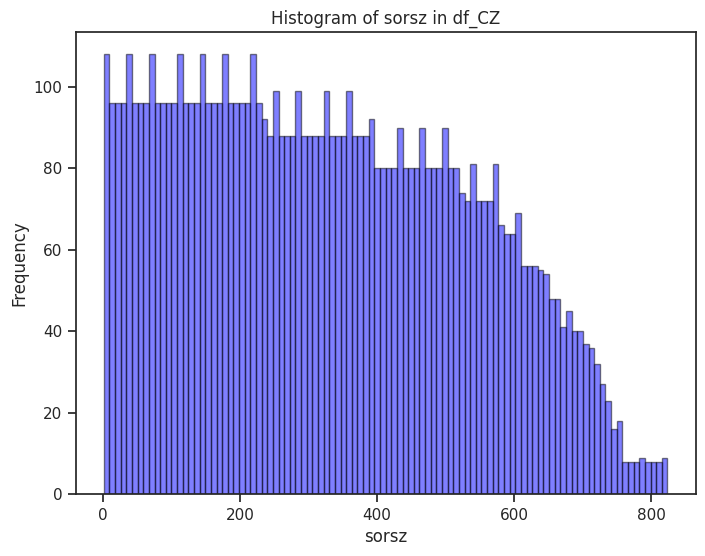

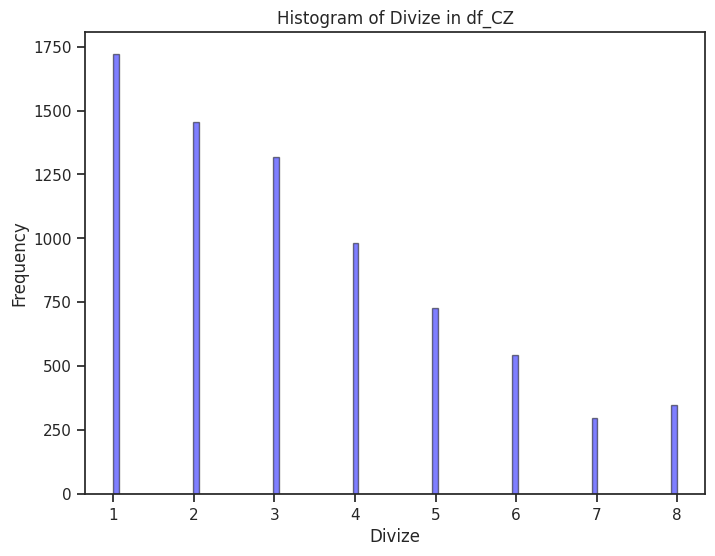

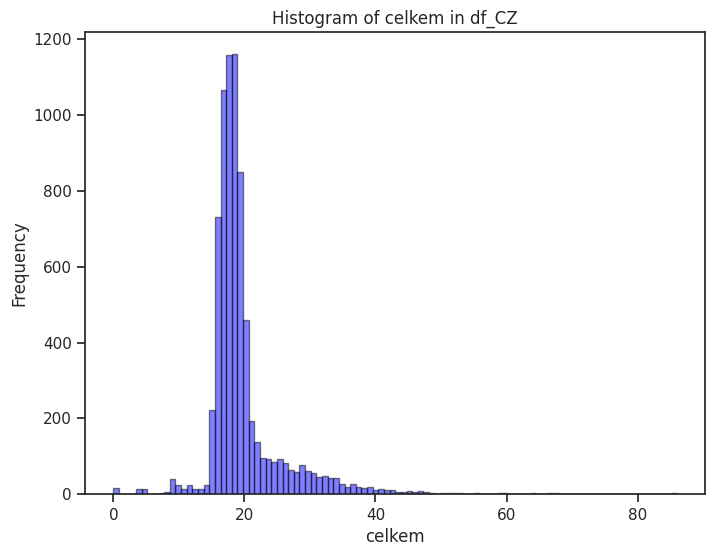

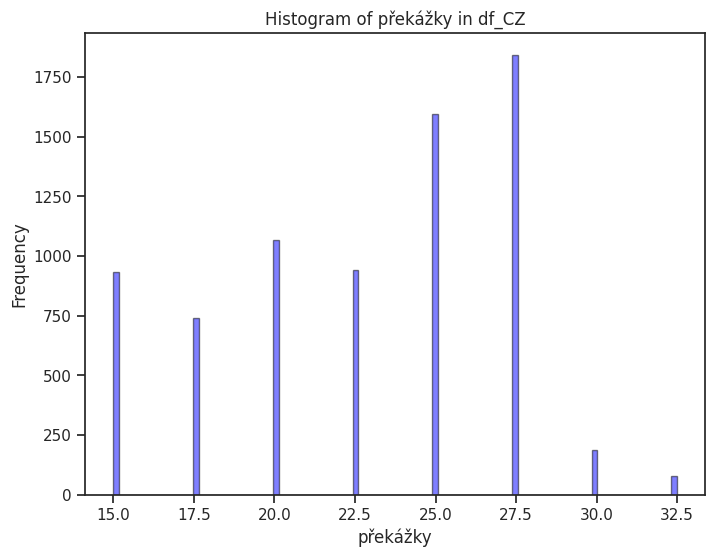

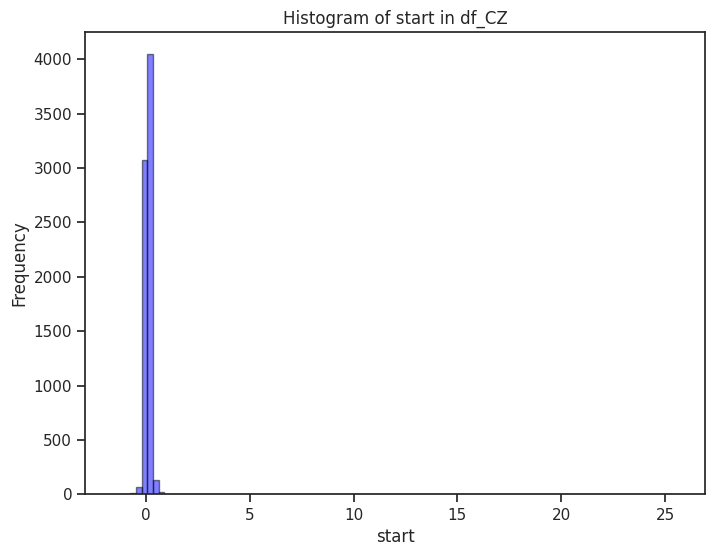

In [14]:
"""
240505
Ebben a kódban a plot_histograms függvényt definiáljuk, amely paraméterként várja a DataFrame nevét (dataframe_name).
A függvény megpróbálja betölteni a megadott DataFrame-et, és ha nem találja, hibát kezel.
Az iteráció és hisztogram kirajzolás része ugyanaz maradt. Most példa használatként megadhatod a DataFrame nevét a plot_histograms függvényben.
Ebben a kódban az `x_bin_width` és `y_bin_width` változókat 1%-os értékekre állítottam,
majd ezeket használtam a `bins` paraméterek megfelelő számának kiszámításához mind az X, mind az Y tengelyen.
`bin_width` értéke az adott oszlop MAX-MIN értékeinek megadott %-ától függ
"""

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dataframe_name):
    try:
        # Betöltjük a DataFrame-et a megadott név alapján
        df = globals()[dataframe_name]

        print("ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)")
        df.info()

        # Iteráció az oszlopokon és hisztogramok kirajzolása
        for column in df.columns:
            # Csak numerikus oszlopokat veszünk figyelembe (elhagyjuk a nem numerikusakat)
            if pd.api.types.is_numeric_dtype(df[column]):
                # Számold ki a MAX és MIN értékek különbségének megadott %-át
                bin_width = 0.01 * (df[column].max() - df[column].min())
                # Készíts egyedi ábrát minden oszlophoz
                plt.figure(figsize=(8, 6))

                # Készíts hisztogramot a számolt bin-szélességgel
                plt.hist(df[column], bins=int((df[column].max() - df[column].min()) / bin_width),
                         color='blue', edgecolor='black', alpha=0.5)

                # Ábra címe és tengelyfeliratai
                plt.title(f'Histogram of {column} in {dataframe_name}')
                plt.xlabel(column)
                plt.ylabel('Frequency')

                # Minden egyes oszlop ábrát külön mutasd be
                plt.show()

    except KeyError:
        print(f"Error: DataFrame with name '{dataframe_name}' not found.")

# Példa használat:
plot_histograms("df_CZ")
#print(df_CZ)

In [15]:
# Írás CSV fájlba
csv_output_path = "df_CZ_output.csv"
df_CZ.to_csv(csv_output_path, index=False)

# Ellenőrzés
print(f"DataFrame successfully written to {csv_output_path}.")

DataFrame successfully written to df_CZ_output.csv.


# Innentől már csak visszaellenőrzés

In [16]:
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_CZ_output = pd.read_csv("df_CZ_output.csv")

# Az adatok megjelenítése
li(df_CZ_output)

,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1.0,1.0,10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,Hanácké škvarek (Heroltice) 2023. április 22-23.
1,2.0,1.0,10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
2,3.0,1.0,10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,Hanácké škvarek (Heroltice) 2023. április 22-23.
3,4.0,1.0,10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
4,5.0,1.0,10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08,Hanácké škvarek (Heroltice) 2023. április 22-23.
5,6.0,1.0,10:15:06,WildRunners Maximini,WildRunners dreamers,18.01,P,25.0,Brooke,-0.59,4.28,Rocky,0.54,5.16,Bella,chyba,4.57,Bree,-0.17,4.22,Hanácké škvarek (Heroltice) 2023. április 22-23.
6,7.0,1.0,10:37:19,WildRunners hopefuls,FOFR DOG,16.14,P,27.5,Enola,0.20,3.87,Maggie,0.13,3.97,Tyna,chyba,4.1,Moon,chyba,3.87,Hanácké škvarek (Heroltice) 2023. április 22-23.
7,8.0,1.0,10:37:19,FOFR DOG,WildRunners hopefuls,18.43,P,22.5,Hessie,-0.06,4.76,Dizzy,OK,4.41,Tex,0.32,3.85,Ogi,0.36,4.78,Hanácké škvarek (Heroltice) 2023. április 22-23.


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


ilyen oszlopaink vannak: (csak a numerikusokról hisztogram)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7397 entries, 0 to 7396
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sorsz        7395 non-null   float64
 1   Divize       7395 non-null   float64
 2   kdy          7395 non-null   object 
 3   kdo          7395 non-null   object 
 4   s kým        7395 non-null   object 
 5   celkem       7395 non-null   float64
 6   V/P/R        7298 non-null   object 
 7   překážky     7384 non-null   float64
 8   jméno        7392 non-null   object 
 9   start        7395 non-null   float64
 10  1.pes        7395 non-null   object 
 11  jméno.1      7355 non-null   object 
 12  stříd.       7145 non-null   object 
 13  2.pes        7349 non-null   object 
 14  jméno.2      7240 non-null   object 
 15  stříd..1     7056 non-null   object 
 16  3.pes        7237 non-null   object 
 17  jméno.3      7186 non-null   o

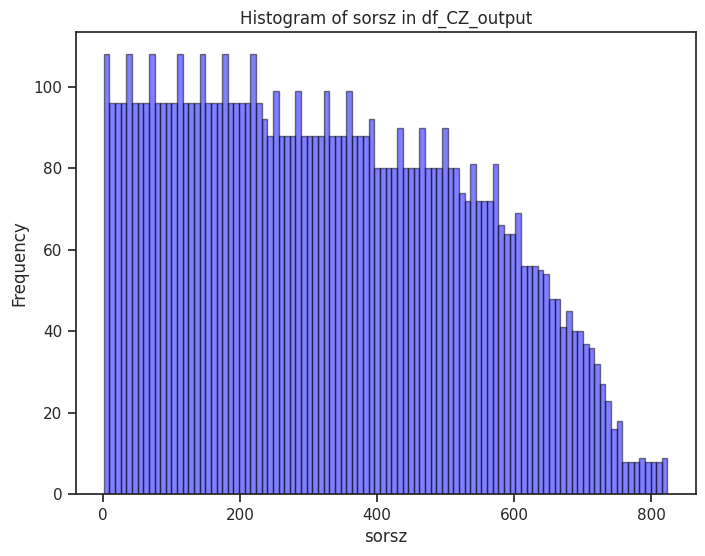

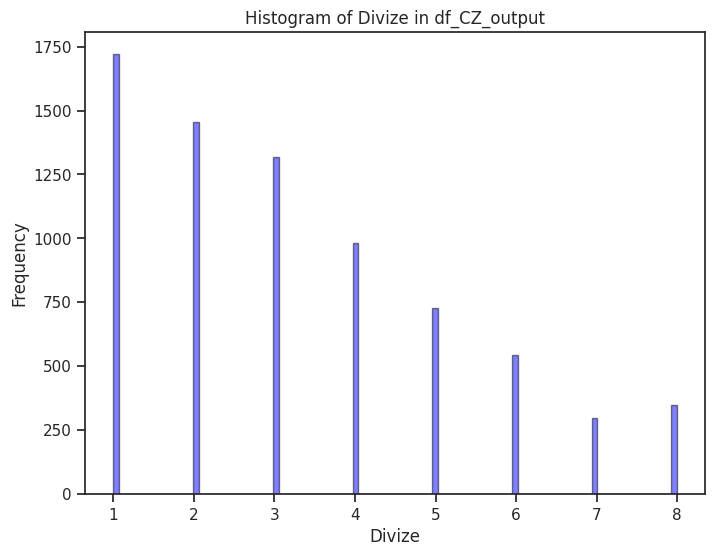

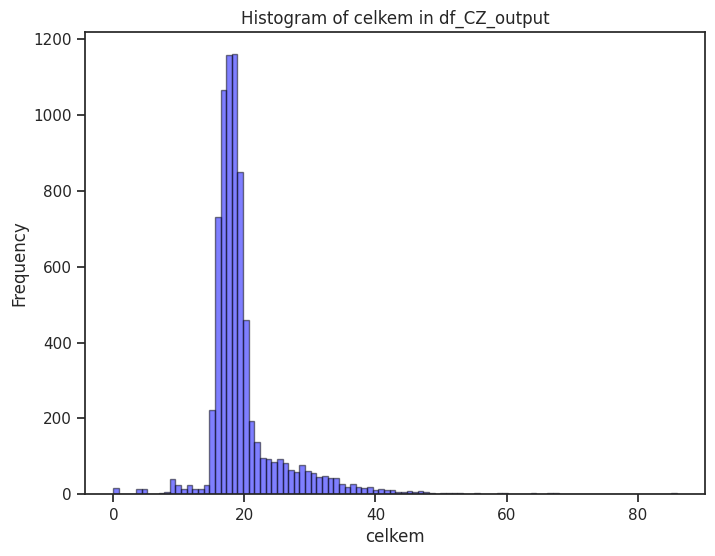

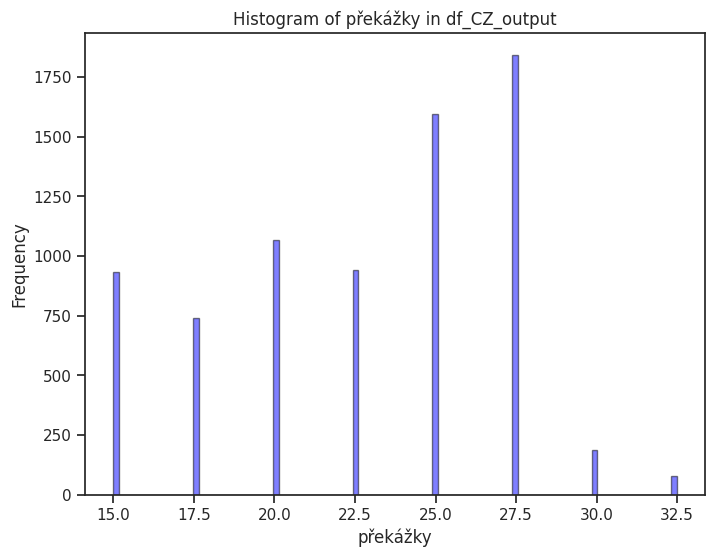

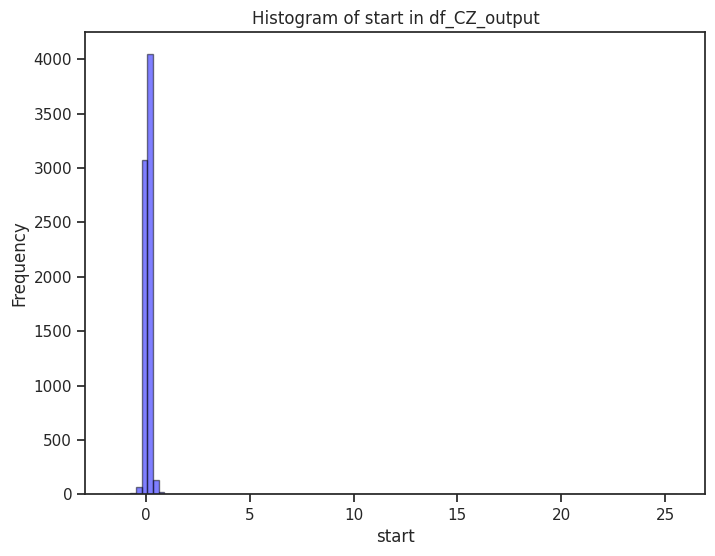

In [17]:
plot_histograms("df_CZ_output")

In [18]:
dinfo(df_CZ_output)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
sorsz,1,float64,7395.0,NaN,NaN,NaN,329.569033,204.381541,1.0,155.0,315.0,493.0,824.0,1.0,758.0,2,1.0,12
Divize,2,float64,7395.0,NaN,NaN,NaN,3.283976,2.013266,1.0,2.0,3.0,5.0,8.0,1.0,8.0,2,1.0,1720
kdy,3,object,7395,3534,14:31:11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:11:57,17:59:17,2,14:31:11,6
kdo,4,object,7395,92,DumbleDogs S,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners dreamers,FUNatic Jumpers,2,DumbleDogs S,228
s kým,5,object,7395,92,DumbleDogs S,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners Maximini,Akela Sparks,2,DumbleDogs S,224
celkem,6,float64,7395.0,NaN,NaN,NaN,19.837903,6.265658,0.0,16.895,18.27,20.0,86.03,17.01,25.49,2,18.27,25
V/P/R,7,object,7298,3,P,4069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,V,99,P,4069
překážky,8,float64,7384.0,NaN,NaN,NaN,22.773226,4.528306,15.0,20.0,25.0,27.5,32.5,25.0,15.0,13,27.5,1844
jméno,9,object,7392,207,Iyrai,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,Pepina,5,Iyrai,242
start,10,float64,7395.0,NaN,NaN,NaN,0.116336,0.589945,-1.55,0.04,0.09,0.14,25.58,-0.24,0.09,2,0.09,458


In [19]:
def list_unique_values(dataframe):
    unique_values = {}
    for column in dataframe.select_dtypes(exclude=['number']).columns:
        unique_values[column] = dataframe[column].value_counts()

    for column, values in unique_values.items():
        # Átmeneti DataFrame létrehozása sorszámozással
        temp_df = pd.DataFrame(values).rename(columns={column: 'Egyedi db'})
        temp_df.index.name = 'Értékek'
        temp_df.reset_index(inplace=True)
        print(f"Egyedi értékek a(z) '{column}' oszlopban:")
        print(temp_df)
        print()

# Függvény meghívása
list_unique_values(df_CZ_output)

Egyedi értékek a(z) 'kdy' oszlopban:
       Értékek  count
0     14:31:11      6
1     14:26:52      6
2     12:22:33      6
3     10:13:25      6
4     12:09:32      6
5     10:12:14      6
6     14:59:14      6
7     08:13:18      6
8     15:02:18      6
...        ...    ...
3525  12:04:45      1
3526  12:20:52      1
3527  11:50:11      1
3528  12:11:05      1
3529  09:03:30      1
3530  12:25:54      1
3531  12:03:09      1
3532  12:01:44      1
3533  14:45:06      1

[3534 rows x 2 columns]

Egyedi értékek a(z) 'kdo' oszlopban:
                     Értékek  count
0               DumbleDogs S    228
1       WildRunners Maximini    225
2                   FOFR DOG    220
3        Flyvaryors New Wave    217
4              Jokers All-in    217
5        The Rebels Hardcore    215
6         WildRunners Zephyr    204
7   The Rebels Rock and Roll    196
8                   RUNami A    184
..                       ...    ...
83         Pilsen 2 F.A.S.T.     19
84              Akela Rocket

In [20]:
df_CZ_output.head()

,sorsz,Divize,kdy,kdo,s kým,celkem,V/P/R,překážky,jméno,start,...,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,event_place
0,1.0,1.0,10:11:57,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,-0.24,...,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,Hanácké škvarek (Heroltice) 2023. április 22-23.
1,2.0,1.0,10:11:57,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,-0.11,...,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
2,3.0,1.0,10:13:25,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,0.02,...,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,Hanácké škvarek (Heroltice) 2023. április 22-23.
3,4.0,1.0,10:13:25,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,-0.63,...,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,Hanácké škvarek (Heroltice) 2023. április 22-23.
4,5.0,1.0,10:15:06,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,-0.06,...,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08,Hanácké škvarek (Heroltice) 2023. április 22-23.


##Folytasd ezzel: Flyball_EFC_CZ_merging_analyzing_XXXXXX.ipynb